<a href="https://colab.research.google.com/github/waleedraf51/Bootcamp2020/blob/master/Height_weight_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
import io
from google.colab import files
upload=files.upload()

Saving weight_height.csv to weight_height.csv


In [6]:
df=pd.read_csv('weight_height.csv')
df.head()

,Unnamed: 0,Gender,Height,Weight
0,0,Male,73.847017,241.893567
1,1,Male,68.847017,162.310473
2,2,Male,74.887017,212.743086
3,3,Male,71.137017,220.042470
4,4,Male,69.881796,206.349801


In [7]:
X=df[['Height']].values
y_true=df[['Weight']].values


In [8]:
def line(x,w=0,b=0):
  return w*x+b
def mean_squared_error(y_true,y_pred):
  s=(y_true-y_pred)**2
  return np.sqrt(s.mean())

Text(0.5, 0, 'b')

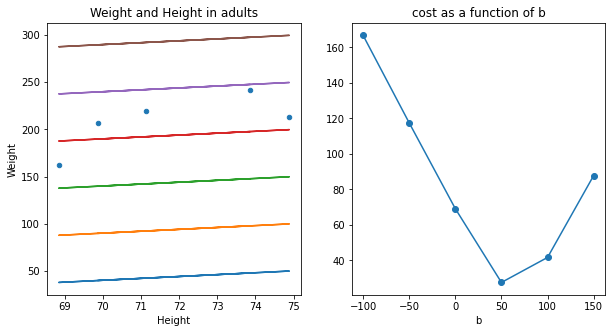

In [29]:
plt.figure(figsize=(10,5))
ax1=plt.subplot(121)
df.plot(kind='scatter', x='Height', y='Weight',  title='Weight and Height in adults', ax=ax1)
bs=np.array([-100,-50,0,50,100,150])
mses=[]
for b in bs:
  y_pred=line(X, w=2, b=b)
  mse=mean_squared_error(y_true,y_pred)
  mses.append(mse)
  plt.plot(X,y_pred)
ax2=plt.subplot(122)
plt.plot(bs,mses,'o-')
plt.title('cost as a function of b')
plt.xlabel('b')

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [20]:
X

array([[73.847017],
       [68.847017],
       [74.887017],
       [71.137017],
       [69.881796]])

In [21]:
X.shape

(5, 1)

In [22]:
model=Sequential()
model.add(Dense(1,input_shape=(1,)))


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(Adam(learning_rate=0.8),'mean_squared_error')

In [26]:
model.fit(X,y_true,epochs=40)

Epoch 1/40
1/1 [==============================] - 1s 526ms/step - loss: 60090.8555
Epoch 2/40
1/1 [==============================] - 0s 7ms/step - loss: 35056.4258
Epoch 3/40
1/1 [==============================] - 0s 4ms/step - loss: 17036.8965
Epoch 4/40
1/1 [==============================] - 0s 4ms/step - loss: 5876.2578
Epoch 5/40
1/1 [==============================] - 0s 3ms/step - loss: 963.0939
Epoch 6/40
1/1 [==============================] - 0s 6ms/step - loss: 1028.3401
Epoch 7/40
1/1 [==============================] - 0s 4ms/step - loss: 4131.8701
Epoch 8/40
1/1 [==============================] - 0s 5ms/step - loss: 8068.3311
Epoch 9/40
1/1 [==============================] - 0s 4ms/step - loss: 11065.3262
Epoch 10/40
1/1 [==============================] - 0s 6ms/step - loss: 12244.6748
Epoch 11/40
1/1 [==============================] - 0s 8ms/step - loss: 11577.0010
Epoch 12/40
1/1 [==============================] - 0s 13ms/step - loss: 9555.8643
Epoch 13/40
1/1 [============

In [27]:
y_predict=model.predict(X)

In [28]:
y_predict

array([[207.08507],
       [193.27612],
       [209.95734],
       [199.60062],
       [196.13397]], dtype=float32)

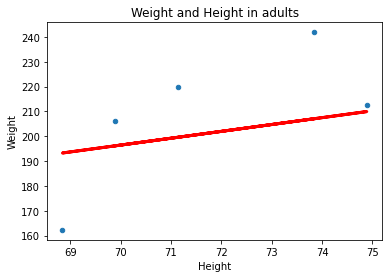

In [31]:
df.plot(kind='scatter', x='Height', y='Weight',  title='Weight and Height in adults')
plt.plot(X,y_predict,color='red',linewidth=3)

In [32]:
w,b=model.get_weights()

In [33]:
w

array([[2.7617905]], dtype=float32)

In [34]:
b


array([3.135085], dtype=float32)

In [36]:
model.predict([1200])

array([[3317.2837]], dtype=float32)